In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 


3D Cube auf den eine Kraft auf eine Seite wirkt 


In [2]:
import numpy as np
from skfem import *
from skfem.supermeshing import intersect, elementwise_quadrature
from skfem.models.elasticity import (linear_elasticity, lame_parameters,
                                     linear_stress)
from skfem.helpers import dot, sym_grad, jump, mul
from skfem.io.json import from_file
from skfem.io.meshio import from_file
from pathlib import Path
import pandas as pd 
import json 
import matplotlib.pyplot as plt 
from skfem.mesh.mesh  import Mesh
from skfem.visuals.matplotlib import plot, draw
from meshio.stl import _stl
import stl
from stl import mesh

import skfem as fem 
from skfem.helpers import dot, grad 


In [1]:

your_mesh = mesh.Mesh.from_file('Cube_3d_printing_sample (1).stl')
your_mesh.save('newOutput.stl',mode=stl.Mode.ASCII)

NameError: name 'mesh' is not defined

In [5]:


m1 = from_file('Cube_3d_printing_sample (1).stl',10).refined(2)
m2 = from_file('OUTPUT.stl',10, dtype = skfem.mesh.MeshHex.dtype).refined(2)


print(m1)
m1.nodes_satisfying
type(m1)

print(m2)

NameError: name 'skfem' is not defined

In [ ]:
@fem.BilinearForm
def a(u,v,_): 
    return dot(grad(u), grad(v))
    
    
import numpy as np

@fem.LinearForm
def L(v,w): 
    x, y = w.x 
    f= np.cos(np.pi*x)*np.sin(np.pi*y)
    #f = np.sin(np.pi*x)
    return f*v




In [ ]:
#definiere Netzte

Netz = fem.ElementTriP1()

#füge Netz und Mesh zusammen 

basis = fem.Basis(m1, Netz)



A = a.assemble(basis)  # resulting matrix 
l = L.assemble(basis)  # lastvektor 

D = basis.get_dofs('right') # getting the Degrees of Freedom of the Stiffnessmatrix



x = fem.solve(*fem.condense(A, l, D=D))




print(m1)
print(D)

plot(m1, x)

NameError: name 'fem' is not defined

<skfem MeshTri1 object>
  Number of elements: 2048
  Number of vertices: 1089
  Number of nodes: 1089
  Named boundaries [# facets]: left [32], bottom [32], right [32], top [32]
[0.         0.         0.         ... 0.04932871 0.04650679 0.04734806]


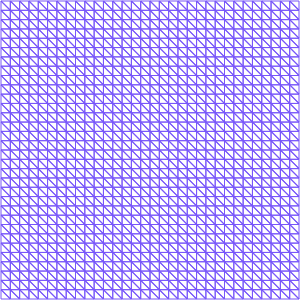

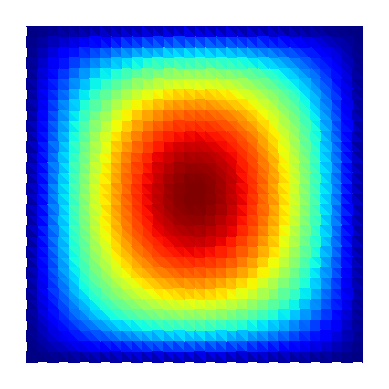

In [14]:
from skfem.helpers import *

@BilinearForm
def anipoisson(u, v, w):
    C = np.array([[10.0, 0.01],
                  [0.01, 10.0]])i
    return dot(mul(C, grad(u)), grad(v))

@fem.BilinearForm
def a(u,v,_): 
    return dot(grad(u), grad(v))
    
    
import numpy as np

@fem.LinearForm
def L(v,w): 
    x, y = w.x 
    #f= np.cos(np.pi*x)*np.sin(np.pi*y)
    f = np.sin(np.pi*x)
    return f*v


mesh = fem.MeshTri().refined(5)
Vh = fem.Basis(mesh, fem.ElementTriP1())



#A = anipoisson.assemble(Vh) 
A = a.assemble(Vh) 
l = L.assemble(Vh)  # lastvektor 

D = Vh.get_dofs()


x = fem.solve(*fem.condense(A, l, D=D))

plot(mesh, x)
print(mesh)
print(x)
mesh

<skfem MeshTri1 object>
  Number of elements: 2048
  Number of vertices: 1089
  Number of nodes: 1089
  Named boundaries [# facets]: left [32], bottom [32], right [32], top [32]


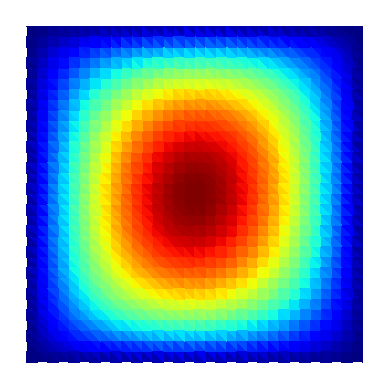

In [12]:
from skfem.helpers import *

@BilinearForm
def anipoisson(u, v, w):
    C = np.array([[1.0, 0.1],
                  [0.01, 1.0]])
    return dot(mul(C, grad(u)), grad(v))

@fem.BilinearForm
def a(u,v,_): 
    return dot(grad(u), grad(v))
    
    
import numpy as np

@fem.LinearForm
def L(v,w): 
    x, y = w.x 
    #f= np.cos(np.pi*x)*np.sin(np.pi*y)
    f = np.sin(np.pi*x)
    return f*v


mesh = fem.MeshTri().refined(5)
Vh = fem.Basis(mesh, fem.ElementTriP1())



A = anipoisson.assemble(Vh) 
#A = a.assemble(Vh) 
l = L.assemble(Vh)  # lastvektor 

D = Vh.get_dofs()


x = fem.solve(*fem.condense(A, l, D=D))

plot(mesh, x)
print(mesh)

